In [288]:
import pandas as pd
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [289]:
df_teams=pd.read_csv('final_data.csv')
df_teams.head()

,year,rank,playoff,firstRound,semis,finals,o_fgm,o_fga,o_ftm,o_fta,...,arena_Quicken Loans Arena,arena_Rose Garden Arena,arena_Staples Center,arena_Target Center,arena_The Palace of Auburn Hills,arena_Time Warner Cable Arena,arena_Toyota Center,arena_UIC Pavilion,arena_US Airways Center,arena_Verizon Center
0,9,7,0,-1,-1,-1,895,2258,542,725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10,2,1,0,-1,-1,1089,2428,569,755,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,8,0,-1,-1,-1,812,1903,431,577,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,4,1,1,1,0,746,1780,410,528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2,1,0,-1,-1,770,1790,490,663,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


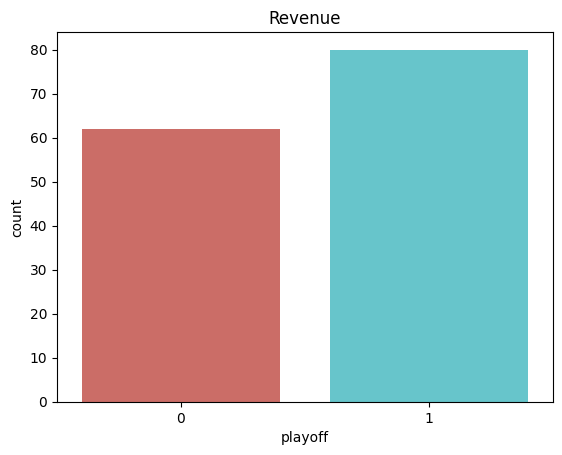

In [290]:
sb.countplot(x='playoff',data=df_teams, palette='hls')
plt.title("Revenue")
plt.show()

In [291]:

def train_evaluate_decision_tree(data, target_col="playoff"):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    years_tested = []

    # Sort the data by the "year" column
    data = data.sort_values(by="year")

    years = sorted(data["year"].unique())

    for year in years[2:]:
        print(year)
        # Split the data into training and test sets
        train_data = data[data["year"] < year]
        test_data = data[data["year"] == year]

        X_train = train_data.drop(target_col, axis=1)
        y_train = train_data[target_col]
        X_test = test_data.drop(target_col, axis=1)
        y_test = test_data[target_col]

        # Create and train the decision tree model
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate accuracy and precision
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        years_tested.append(year)

    return years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores


In [292]:
years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores = train_evaluate_decision_tree(df_teams)
accuracy_scores, precision_scores, recall_scores, f1_scores

3
4
5
6
7
8
9
10


([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

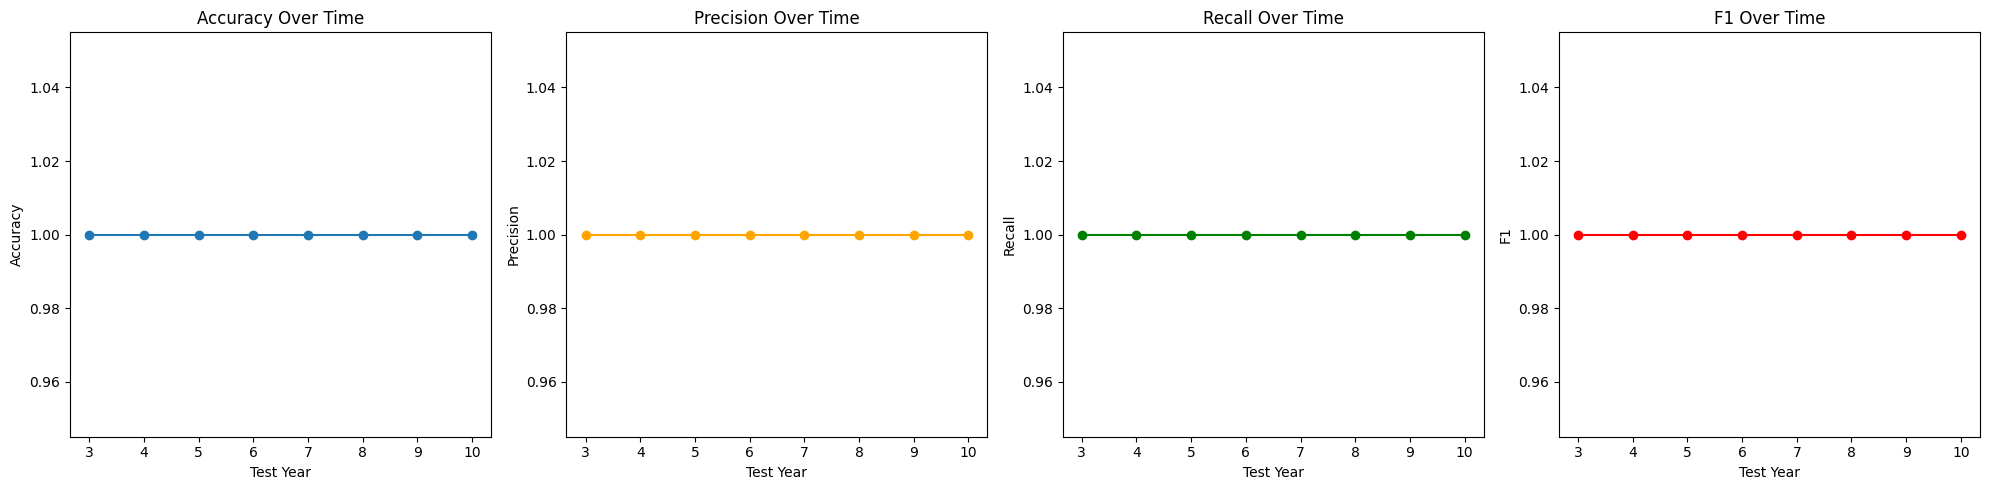

In [293]:
# Create a graph to plot accuracy and precision over time
plt.figure(figsize=(20, 5))

# Plot accuracy
plt.subplot(1, 4, 1)
plt.plot(years_tested, accuracy_scores, marker='o')
plt.title('Accuracy Over Time')
plt.xlabel('Test Year')
plt.ylabel('Accuracy')

# Plot precision
plt.subplot(1, 4, 2)
plt.plot(years_tested, precision_scores, marker='o', color='orange')
plt.title('Precision Over Time')
plt.xlabel('Test Year')
plt.ylabel('Precision')

# Plot recall
plt.subplot(1, 4, 3)
plt.plot(years_tested, recall_scores, marker='o', color='green')
plt.title('Recall Over Time')
plt.xlabel('Test Year')
plt.ylabel('Recall')

# Plot f1
plt.subplot(1, 4, 4)
plt.plot(years_tested, f1_scores, marker='o', color='red')
plt.title('F1 Over Time')
plt.xlabel('Test Year')
plt.ylabel('F1')


plt.tight_layout()
plt.show()